In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
input_file = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report.tsv"
directlfq_file = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report.tsv.diann_precursor_ms1_and_ms2.protein_intensities.tsv"

diann_protein_intensities = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report.tsv.diann_protein.aq_reformat.tsv"
iq_protein_intensities = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report_iq_results.tsv"

samplemap  = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/samplemap.tsv"

run_directlfq = True
run_protein_reformating = False

In [3]:
if run_protein_reformating:
    import directlfq.utils as lfq_utils
    lfq_utils.import_data(input_file=input_file, input_type_to_use="diann_protein")

In [4]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="diann_precursor_ms1_and_ms2", min_nonan=1)


2024-01-24 15:37:47,283 - directlfq.lfq_manager - INFO - Starting directLFQ analysis.
2024-01-24 15:37:47,406 - directlfq.utils - INFO - using input type diann_precursor_ms1_and_ms2
2024-01-24 15:38:02,613 - directlfq.lfq_manager - INFO - Performing sample normalization.
2024-01-24 15:38:04,197 - directlfq.lfq_manager - INFO - Estimating lfq intensities.
2024-01-24 15:38:04,222 - directlfq.protein_intensity_estimation - INFO - 11788 lfq-groups total
2024-01-24 15:38:10,458 - directlfq.protein_intensity_estimation - INFO - using 10 processes
2024-01-24 15:38:10,963 - directlfq.protein_intensity_estimation - INFO - lfq-object 0
2024-01-24 15:38:11,413 - directlfq.protein_intensity_estimation - INFO - lfq-object 300
2024-01-24 15:38:11,814 - directlfq.protein_intensity_estimation - INFO - lfq-object 600
2024-01-24 15:38:12,168 - directlfq.protein_intensity_estimation - INFO - lfq-object 900
2024-01-24 15:38:12,611 - directlfq.protein_intensity_estimation - INFO - lfq-object 1200
2024-01-2

In [5]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils


samples_used = lfqutils.get_samples_used_from_samplemap_file(samplemap, cond1="S1", cond2="S2")





restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_iq = lfqbenchmark.ResultsTableIq(input_file=iq_protein_intensities, input_name="iq", samples_c1=samples_used[0], samples_c2=samples_used[1])

restable_diann = lfqbenchmark.ResultsTableDirectLFQ(input_file=diann_protein_intensities, input_name="DIANN", samples_c1=samples_used[0], samples_c2=samples_used[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:

In [6]:
display(restable_iq.formated_dataframe)
display(restable_directlfq.formated_dataframe)
display(restable_diann.formated_dataframe)

,protein,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R03,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R03,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,P0CG40,399044.298225,393193.930192,466436.312727,400725.674709,383717.523799,4.458798e+05,399044.298225,400725.674709,-0.006066,399884.986467
1,Q86U42,146637.625915,136744.373352,144356.534457,158803.677339,154639.552058,1.459582e+05,144356.534457,154639.552058,-0.099273,149498.043258
2,P37108,217117.633612,234467.526584,239608.072922,230674.433682,242917.404786,2.247949e+05,234467.526584,230674.433682,0.023530,232570.980133
3,Q96JP5,75074.616190,51527.666864,68152.006248,67234.467807,76040.729613,7.201105e+04,68152.006248,72011.049986,-0.079462,70081.528117
4,P36578,418459.134032,445605.494870,462189.900964,435077.385066,436150.418888,4.465315e+05,445605.494870,436150.418888,0.030941,440877.956879
...,...,...,...,...,...,...,...,...,...,...,...
11666,O17005,NaN,NaN,6556.525382,39657.352969,31660.372975,1.325625e+04,6556.525382,31660.372975,-2.271675,19108.449178
11667,O61219,36436.457488,35186.024233,43536.353419,43004.096250,39746.363443,3.989696e+04,36436.457488,39896.960382,-0.130896,38166.708935
11668,Q20770,13865.651053,18660.166826,20649.624385,24906.552665,22825.598393,2.224607e+04,18660.166826,22825.598393,-0.290691,20742.882610
11669,P53013;Q05639,708745.531591,653026.722419,748161.012257,881704.002954,829021.599468,1.025526e+06,708745.531591,881704.002954,-0.315027,795224.767272


,protein,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R03,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R03,Protein.Group,Protein.Names,Genes,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,7.722974e+05,1.336567e+06,1.057122e+06,1.156439e+06,1.196062e+06,1.134216e+06,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,A0A061ACH4_CAEEL;A0A061ACK7_CAEEL;A0A061ADS3_C...,CELE_Y62E10A.13,1.057122e+06,1.156439e+06,-0.129547,1.106781e+06
1,A0A061ACK1;A0A061AIW8;A0A061AKM4;Q86D10,1.640165e+06,2.000954e+06,2.017606e+06,1.637549e+06,1.825947e+06,1.618496e+06,A0A061ACK1;A0A061AIW8;A0A061AKM4;Q86D10,A0A061ACK1_CAEEL;A0A061AIW8_CAEEL;A0A061AKM4_C...,CELE_F59B8.1,2.000954e+06,1.637549e+06,0.289150,1.819252e+06
2,A0A061ACL3;O76618;Q965I6,3.475015e+07,3.367735e+07,2.905229e+07,4.184911e+07,4.250218e+07,4.258277e+07,A0A061ACL3;O76618;Q965I6,A0A061ACL3_CAEEL;O76618_CAEEL;Q965I6_CAEEL,cars-1,3.367735e+07,4.250218e+07,-0.335758,3.808976e+07
3,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A4V0IJW4;A0...,6.051397e+07,6.238809e+07,5.751994e+07,8.567846e+07,8.861990e+07,7.566930e+07,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A4V0IJW4;A0...,A0A061ACM2_CAEEL;A0A061ACP8_CAEEL;A0A061ADW6_C...,eps-8,6.051397e+07,8.567846e+07,-0.501664,7.309621e+07
4,A0A061ACY0;Q21224,5.410215e+06,5.078181e+06,4.418281e+06,6.273874e+06,6.646970e+06,6.202716e+06,A0A061ACY0;Q21224,A0A061ACY0_CAEEL;Q21224_CAEEL,ath-1,5.078181e+06,6.273874e+06,-0.305045,5.676027e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,V6CLA2,1.742243e+07,1.646378e+07,1.306995e+07,1.973214e+07,2.381185e+07,1.753794e+07,V6CLA2,HECD1_CAEEL,hecd-1,1.646378e+07,1.973214e+07,-0.261251,1.809796e+07
11742,V6CLG8,4.105234e+06,5.309942e+06,3.140401e+06,6.498543e+06,8.025066e+06,6.348271e+06,V6CLG8,V6CLG8_CAEEL,hsp-60,4.105234e+06,6.498543e+06,-0.662652,5.301889e+06
11743,V6CLP5,1.693247e+08,1.694700e+08,1.779412e+08,2.226828e+08,2.092768e+08,2.247533e+08,V6CLP5,KETN1_CAEEL,ketn-1,1.694700e+08,2.226828e+08,-0.393960,1.960764e+08
11744,V6CLQ8;V6CLV0,1.280377e+07,1.544302e+07,1.603935e+07,1.881401e+07,2.078057e+07,2.047136e+07,V6CLQ8;V6CLV0,V6CLQ8_CAEEL;V6CLV0_CAEEL,pqn-22,1.544302e+07,2.047136e+07,-0.406652,1.795719e+07


,protein,ion,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R03,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R03,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A023PYF4,YE145_YEAST,544268.0,417729.0,464828.0,412056.0,435935.0,470289.0,464828.0,435935.0,0.092584,450381.5
1,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,A0A061ACH4_CAEEL;A0A061ACK7_CAEEL;A0A061ADS3_C...,158414.0,229506.0,228050.0,267741.0,265953.0,268719.0,228050.0,267741.0,-0.231488,247895.5
2,A0A061ACK1;A0A061AIW8;A0A061AKM4;Q86D10,A0A061ACK1_CAEEL;A0A061AIW8_CAEEL;A0A061AKM4_C...,748050.0,686265.0,858649.0,517367.0,594011.0,439250.0,748050.0,517367.0,0.531947,632708.5
3,A0A061ACL3;O76618;Q965I6,A0A061ACL3_CAEEL;O76618_CAEEL;Q965I6_CAEEL,1373000.0,1288840.0,1294210.0,1647560.0,1625130.0,1718860.0,1294210.0,1647560.0,-0.348259,1470885.0
4,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A4V0IJW4;A0...,A0A061ACM2_CAEEL;A0A061ACP8_CAEEL;A0A061ADW6_C...,2603830.0,2786170.0,2504260.0,3229710.0,3330260.0,3095400.0,2603830.0,3229710.0,-0.310769,2916770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13561,V6CLG8,V6CLG8_CAEEL,1063340.0,1221340.0,1035000.0,1162960.0,1371210.0,1259920.0,1063340.0,1259920.0,-0.244729,1161630.0
13562,V6CLP5,KETN1_CAEEL,5311470.0,5417460.0,5364780.0,6488850.0,6493780.0,6460810.0,5364780.0,6488850.0,-0.274444,5926815.0
13563,V6CLQ8;V6CLV0,V6CLQ8_CAEEL;V6CLV0_CAEEL,1938260.0,1842410.0,2134610.0,2301040.0,2291520.0,2286380.0,1938260.0,2291520.0,-0.241543,2114890.0
13564,W6RRP9;W6RT83,W6RRP9_CAEEL;W6RT83_CAEEL,749273.0,640319.0,745455.0,617026.0,665880.0,788403.0,745455.0,665880.0,0.162859,705667.5


In [7]:
organism_annotator_diann_based = lfqbenchmark.OrganismAnnotatorDIANN(mapping_file=input_file)
organism_annotator_diann_based.annotate_table_with_organism(restable_directlfq)
organism_annotator_diann_based.annotate_table_with_organism(restable_diann)
organism_annotator_diann_based.annotate_table_with_organism(restable_iq)


In [8]:
import seaborn as sns
import directlfq.visualizations as lfq_viz

class MultiOrganismMultiMethodBoxPlotAdapted(lfq_viz.MultiOrganismMultiMethodBoxPlot):
    def plot_boxplot(self):
        color_palette = sns.color_palette(self._colorlist_hex, n_colors=len(self._fcs_to_expect))
        sns.violinplot(data=self._method_ratio_results_table, x="method", y = "log2fc", hue= "organism", palette=color_palette, hue_order=self._organisms_to_plot, ax=self.ax, linewidth=0.8)


In [9]:
class MultiOrganismIntensityFCPlotter():
    def __init__(self, ax, resultstable_w_ratios, organisms_to_plot = None, fcs_to_expect = None, title = ""):
        print('init MultiOrganismIntensityFCPlotter')
        self.ax = ax
        self._color_list_hex = ['#ffd479', '#325e7a', '#bad566']
        self._resultstable_w_ratios = resultstable_w_ratios
        self._organism_column = resultstable_w_ratios.organism_column
        self._log2fc_column = resultstable_w_ratios.log2fc_column
        self._mean_intensity_column = resultstable_w_ratios.mean_intensity_column
        
        self._organisms_to_plot = self._get_organisms_to_plot(organisms_to_plot)
        self._fcs_to_expect = fcs_to_expect

        self._title = self._get_title(title)
        self._scatter_per_organism()
        self._add_expected_lines()

    def _get_organisms_to_plot(self, organisms_to_plot):
        if organisms_to_plot is not None:
            return organisms_to_plot
        else:
            return sorted(list(set(self._resultstable_w_ratios.formated_dataframe[self._organism_column].astype('str'))))
    
    def _get_title(self, title):
        if title !="":
            self._print_infos_about_data()
            return title
        return self._generate_title()

    def _print_infos_about_data(self):
        for organism in self._organisms_to_plot:
            subtable_organism = self._get_organism_subtable(organism)
            print(self._get_stats_of_organism(organism, subtable_organism))

    def _generate_title(self):
        for organism in self._organisms_to_plot:
            subtable_organism = self._get_organism_subtable(organism)
            title += self._get_stats_of_organism(organism, subtable_organism)
        return title

    def _scatter_per_organism(self):
        complete_table = self._resultstable_w_ratios.formated_dataframe.copy()
        complete_table[self._mean_intensity_column] = np.log2(complete_table[self._mean_intensity_column])
        complete_table = self._remove_omitted_organisms_from_table(complete_table)
        color_palette = sns.color_palette(self._color_list_hex, n_colors=len(self._organisms_to_plot))
        sns.scatterplot(data= complete_table, x =self._mean_intensity_column, y= self._log2fc_column, hue=self._organism_column, alpha=0.15, ax=self.ax, 
        hue_order=self._organisms_to_plot, palette=color_palette, size=0.2)
        self.ax.set_title(self._title)
    
    def _remove_omitted_organisms_from_table(self, complete_table):
        row_w_permitted_organism = [x in self._organisms_to_plot for x in complete_table["organism"]]
        return complete_table[row_w_permitted_organism]

    def _add_expected_lines(self):
        if self._fcs_to_expect is not None:
            for idx, fc in enumerate(self._fcs_to_expect):
                color = self._color_list_hex[idx]
                self.ax.axhline(fc, color = color)

    def _get_organism_subtable(self, organism):
        complete_table = self._resultstable_w_ratios.formated_dataframe
        return complete_table[complete_table[self._organism_column] == organism]
    
    def _get_stats_of_organism(self, organism, subtable_organism):
        fcs = subtable_organism[self._log2fc_column].to_numpy()
        fcs = fcs[np.isfinite(fcs)]
        median_fc = np.nanmedian(fcs)
        std_fc = np.nanstd(fcs)
        num_ratios = sum(~np.isnan(fcs))
        return f"{organism} num:{num_ratios} median_FC:{median_fc:.2} STD:{std_fc:.2}\n"

YEAST num:2201 median_FC:1.1 STD:0.43

HUMAN num:5824 median_FC:0.03 STD:0.23

CAEEL num:3321 median_FC:-0.35 STD:0.29

YEAST num:2206 median_FC:0.98 STD:0.42

HUMAN num:5790 median_FC:-0.018 STD:0.22

CAEEL num:3300 median_FC:-0.38 STD:0.29

YEAST num:2323 median_FC:1.1 STD:0.51

HUMAN num:6357 median_FC:0.07 STD:0.31

CAEEL num:3690 median_FC:-0.29 STD:0.39



/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


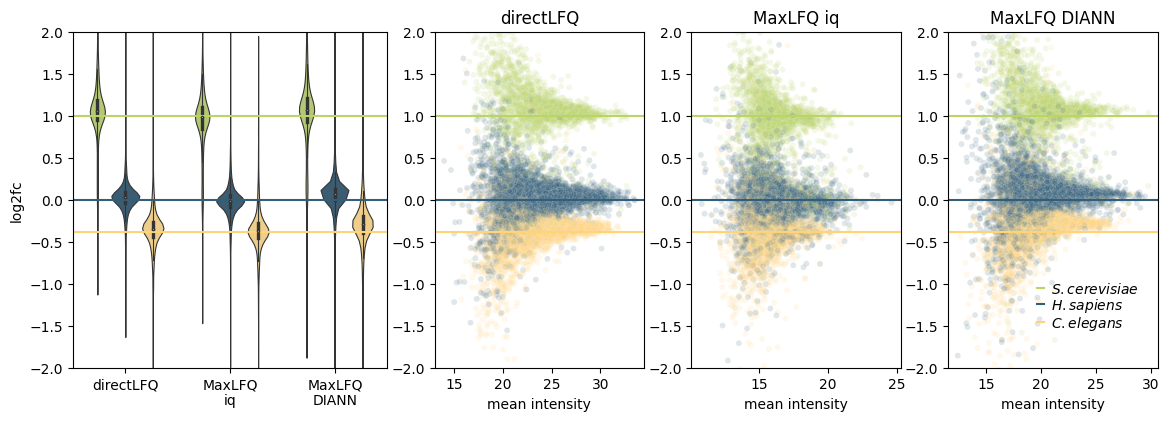

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.benchmarking




methodname2resultsdf = {'directLFQ' : restable_directlfq.formated_dataframe, 'MaxLFQ\niq' : restable_iq.formated_dataframe, 'MaxLFQ\nDIANN' : restable_diann.formated_dataframe}

a4_dims = (11.7, 8.27)
a4_width_no_margin = 10.5
fig, axes = plt.subplots(1, 4,figsize=(14,4.363 ), gridspec_kw={'width_ratios' : [1.5, 1, 1, 1]})

organisms_to_plot = [ "YEAST", "HUMAN", "CAEEL"]
fcs_to_expect = [  np.log2(2), 0, -np.log2(1.3)]

merged_table = directlfq.benchmarking.ResultsTableMerger(method_name2results_df=methodname2resultsdf).merged_table


MultiOrganismMultiMethodBoxPlotAdapted(method_ratio_results_table=merged_table, ax = axes[0], organisms_to_plot=organisms_to_plot,fcs_to_expect= fcs_to_expect)



fcplotter_directLFQ = directlfq.benchmarking.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_directlfq, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="directLFQ")

fcplotter_maxLFQiq = directlfq.benchmarking.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios= restable_iq, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ iq")
fcplotter_maxLFQspect = directlfq.benchmarking.MultiOrganismIntensityFCPlotter(ax=axes[3], resultstable_w_ratios= restable_diann, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ DIANN")



for ax in axes:
    ax.get_legend().remove()

for ax in axes[1:]:
    ax.set_ylabel("")

for ax in axes:
    ax.set_xlabel("mean intensity")
axes[0].set_xlabel("")
axes[0].set_ylim([-2, 2])
# axes[0].set_ylim([15, 33])
axes[1].set_ylim([-2, 2])
# axes[1].set_ylim([17, 35])
axes[2].set_ylim([-2, 2])

axes[3].set_ylim([-2, 2])

lines = axes[1].get_lines()
#axes[1].legend(lines, ["S. cerevisiae", "H. sapiens", "C. elegans"], loc='upper left', bbox_to_anchor=(1, 1))
fig.legend(lines, ["$S. cerevisiae$", "$H. sapiens$", "$C. elegans$"], bbox_to_anchor=[0.85, 0.25], 
           loc='center', ncol=1, title = None, frameon = False, labelspacing = 0, handlelength = 0.5, handletextpad = 0.5)
#change label type in legend

